In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from skimage.metrics import structural_similarity as ssim

import cv2
import skimage

### 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
a) Для отображения картинки воспользуйтесь вспомогательной функцией:


In [2]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(14, 10))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

b) Для загрузки картинки можно использовать код:


In [10]:
img = cv2.imread('claster.jpg')
img = cv2.resize(img, (192, 192))

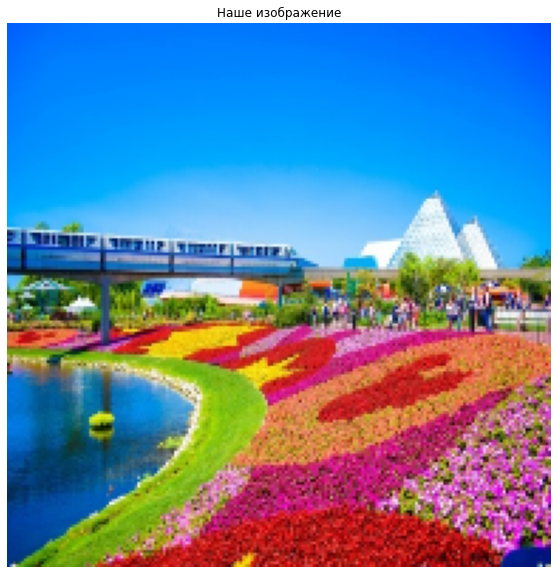

In [11]:
draw_picture(img, 'Наше изображение')

### 2. Реализуйте три модели кластеризации:
a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.


In [12]:
data = img.reshape((-1,3))
data = np.float32(data)
image = pd.DataFrame(data)
image.head()

,0,1,2
0,254.0,92.0,0.0
1,254.0,94.0,0.0
2,254.0,96.0,0.0
3,253.0,96.0,0.0
4,255.0,99.0,0.0


In [40]:
K=[2, 5, 10, 20]

def K_Means(K=None, rs=13):
    image = pd.DataFrame(data)
    model = KMeans(n_clusters = K, random_state=13)
    predict = model.fit_predict(image)
    image['cluster'] = predict
    image.set_index('cluster', inplace=True)
    trained = image.copy(deep=True)
    
    for cluster in range(K):
        for column in trained.columns:
            trained.loc[cluster, column] = trained.loc[cluster, column].median()
    
    image = image.to_numpy()
    trained = trained.to_numpy()
    return image, trained

In [41]:
%%time
K_Means(2)

Wall time: 117 ms


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[253., 144.,   1.],
        [253., 144.,   1.],
        [253., 144.,   1.],
        ...,
        [253., 144.,   1.],
        [ 61., 105., 175.],
        [ 61., 105., 175.]], dtype=float32))

In [42]:
%%time
K_Means(5)

Wall time: 315 ms


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254., 142.,   0.],
        [254., 142.,   0.],
        [254., 142.,   0.],
        ...,
        [116.,  79.,  24.],
        [242., 194., 165.],
        [242., 194., 165.]], dtype=float32))

In [43]:
%%time
K_Means(10)

Wall time: 820 ms


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254., 141.,   0.],
        [254., 141.,   0.],
        [254., 141.,   0.],
        ...,
        [141.,  86.,   7.],
        [165., 144., 202.],
        [165., 144., 202.]], dtype=float32))

In [44]:
%%time
K_Means(20)

Wall time: 1.81 s


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254., 124.,   0.],
        [254., 124.,   0.],
        [254., 124.,   0.],
        ...,
        [118.,  66.,   5.],
        [105., 148., 171.],
        [178., 163., 213.]], dtype=float32))

b) DBSCAN


In [48]:
def DB_SCAN():
    image = pd.DataFrame(data)
    model = DBSCAN(eps=5)
    predict = model.fit_predict(image)
    image['cluster'] = predict
    image.set_index('cluster', inplace=True)
    trained = image.copy(deep=True)
    
    for cluster in range(max(predict)):
            for column in trained.columns:
                trained.loc[cluster, column] = trained.loc[cluster, column].median()
                
    image = image.to_numpy()
    trained = trained.to_numpy()
    return image, trained

In [49]:
%%time
DB_SCAN()

Wall time: 928 ms


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254., 150.,   0.],
        [254., 150.,   0.],
        [254., 150.,   0.],
        ...,
        [127.,  24.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32))

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [50]:
def AggClust(K=None):
    image = pd.DataFrame(data)
    model = AgglomerativeClustering(distance_threshold=None, n_clusters = K)
    predict = model.fit_predict(image)
    image['cluster'] = predict
    image.set_index('cluster', inplace=True)
    trained = image.copy(deep=True)
    
    for cluster in range(K):
        for column in trained.columns:
            trained.loc[cluster, column] = trained.loc[cluster, column].median()

    image = image.to_numpy()
    trained = trained.to_numpy()
    return image, trained

In [51]:
%%time
AggClust(2)

Wall time: 27.9 s


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[253. , 150. ,   1. ],
        [253. , 150. ,   1. ],
        [253. , 150. ,   1. ],
        ...,
        [ 62.5,  91. , 148. ],
        [253. , 150. ,   1. ],
        [253. , 150. ,   1. ]], dtype=float32))

In [52]:
%%time
AggClust(5)

Wall time: 27.8 s


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254., 140.,   0.],
        [254., 140.,   0.],
        [254., 140.,   0.],
        ...,
        [121.,  83.,  19.],
        [240., 182., 148.],
        [240., 182., 148.]], dtype=float32))

In [53]:
%%time
AggClust(10)

Wall time: 26.8 s


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254. , 140. ,   0. ],
        [254. , 140. ,   0. ],
        [254. , 140. ,   0. ],
        ...,
        [143. ,  89. ,   6. ],
        [252. , 180. ,  81. ],
        [167.5, 136. , 208. ]], dtype=float32))

In [54]:
%%time
AggClust(20)

Wall time: 26.3 s


(array([[254.,  92.,   0.],
        [254.,  94.,   0.],
        [254.,  96.,   0.],
        ...,
        [117.,  29.,   1.],
        [157., 155., 145.],
        [163., 173., 163.]], dtype=float32),
 array([[254., 124.,   0.],
        [254., 124.,   0.],
        [254., 124.,   0.],
        ...,
        [139.,  74.,   3.],
        [186., 149.,  99.],
        [167., 162., 214.]], dtype=float32))

Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
Сформулируйте выводы по проделанной работе.
a) Какая модель показала лучший результат?

In [62]:
print(f'DBSCAN SSIM = {ssim(DB_SCAN()[0], DB_SCAN()[1], multichannel=True)}')

for i in K:
    print(f'KMEANS с n_clusters:{i} SSIM = {ssim(K_Means(i)[0], K_Means(i)[1], multichannel=True)}')
    print(f'AgglomerativeClustering с n_clusters:{i} SSIM = {ssim(AggClust(i)[0], AggClust(i)[1], multichannel=True)}')

DBSCAN SSIM = 0.4761951889165383
KMEANS с n_clusters:2 SSIM = 0.04944380093464781
AgglomerativeClustering с n_clusters:2 SSIM = 0.06877853535654445
KMEANS с n_clusters:5 SSIM = 0.18069810097840952
AgglomerativeClustering с n_clusters:5 SSIM = 0.174822187764664
KMEANS с n_clusters:10 SSIM = 0.28840749974581525
AgglomerativeClustering с n_clusters:10 SSIM = 0.26016725499583243
KMEANS с n_clusters:20 SSIM = 0.3797711287517635
AgglomerativeClustering с n_clusters:20 SSIM = 0.3616678421563971


Выводы - модель AgglomerativeClustering, кладет систему, поглащаю с невроятной скоростью ОЗУ. Считается очень медленно, даже на хорошей системе. Чтобы хоть как-то адекватно с ней работать пришлось в нескоько раз уменьшить качество изображения (для стандартного размера, запрос в ~400Гб ОЗУ). 
По метрике выйграла модель DBSCAN, хоть и не самая быстрая. Ближе всего к ней KMeans(20) и AggClust(20), она на 3-ем месте.
Я бы выбирал между DBSCAN(лучшая точность здесь, но немного медленно) и KMeans(20) у нее метрика послабее, зато выполняется в пределах пары секунд. Про AgglomerativeClustering выше описал :D